In [19]:
import numpy as np
import torch
import torchvision
from torchvision import models, transforms
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
path = "/content/drive/MyDrive/UTKFaceMobileNet.pth"

In [22]:
root=  "/content/drive/MyDrive/BinarySplit"

In [23]:
transform_func = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.Resize((224,224)),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [24]:
model = torchvision.models.mobilenet_v2(pretrained=False, num_classes = 2)
model.load_state_dict(torch.load(path))
model = torch.nn.Sequential(*list(model.children())[:-1])
model.eval()

Sequential(
  (0): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=1e-05, m

In [25]:
transform_func = transforms.Compose([transforms.RandomHorizontalFlip(),
                                transforms.Resize((224,224)),
                                transforms.RandomVerticalFlip(),
                                transforms.RandomRotation(15),
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 19971 samples in 0.471s...
[t-SNE] Computed neighbors for 19971 samples in 221.199s...
[t-SNE] Computed conditional probabilities for sample 1000 / 19971
[t-SNE] Computed conditional probabilities for sample 2000 / 19971
[t-SNE] Computed conditional probabilities for sample 3000 / 19971
[t-SNE] Computed conditional probabilities for sample 4000 / 19971
[t-SNE] Computed conditional probabilities for sample 5000 / 19971
[t-SNE] Computed conditional probabilities for sample 6000 / 19971
[t-SNE] Computed conditional probabilities for sample 7000 / 19971
[t-SNE] Computed conditional probabilities for sample 8000 / 19971
[t-SNE] Computed conditional probabilities for sample 9000 / 19971
[t-SNE] Computed conditional probabilities for sample 10000 / 19971
[t-SNE] Computed conditional probabilities for sample 11000 / 19971
[t-SNE] Computed conditional probabilities for sample 12000 / 19971
[t-SNE] Computed conditional probabilities for 

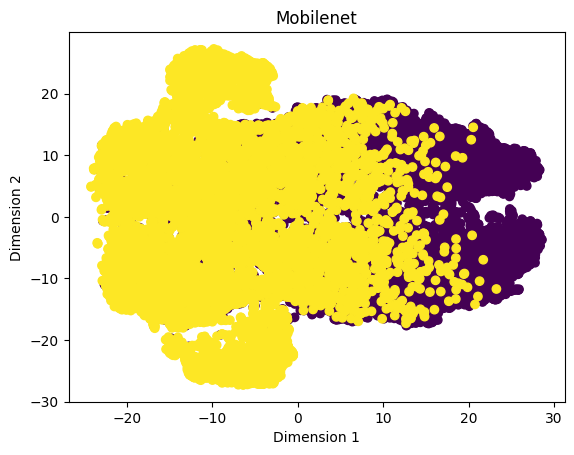

In [26]:
data_set = torchvision.datasets.ImageFolder(root, transform=transform_func)
labels_lst = []
features = []
for inputs, labels in data_set:
    inputs = inputs.unsqueeze(0)
    with torch.no_grad():
        features.append(model(inputs).squeeze().numpy().flatten())
        labels_lst.append(labels)
features_np = np.array(features)
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=400).fit_transform(features_np)
plt.scatter(tsne[:, 0], tsne[:, 1], c=labels_lst)
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.title("Mobilenet")
plt.show()